GOLD PRICE DATA

Work flow :
1. gold price data
2. data pre processing
3. data analytics
4. split the data into train and test
5. model training (using random forest regressor)
6. evaluation

Importing all the dependencies

In [ ]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and processing

In [ ]:
#loading a csv data to a pandas data-frame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
#printing the first 5 rows of the data
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#printing the last 5 rows of the data
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#numbers of rows and columns of the data
gold_data.shape

(2290, 6)

In [ ]:
#getting some info. about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking for missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#it will give you the statistical insight(measure) of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

1. positive
2. negative


In [ ]:
correlation = gold_data.corr()

<AxesSubplot:>

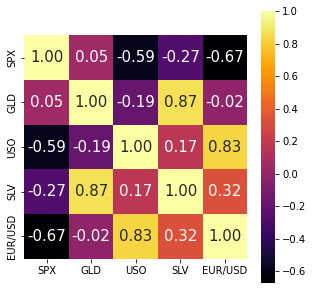

In [ ]:
#construction a heap map to understand a correlation
plt.figure(figsize = (5,5))
sns.heatmap(correlation, cbar = True, square=True, fmt='.2f', annot=True, annot_kws = {'size':15}, cmap = 'inferno')

In [ ]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

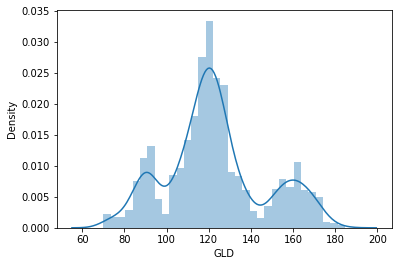

In [ ]:
#checking the distrubution of the gold price
sns.distplot(gold_data['GLD'])

Spliting the data

In [ ]:
#separating data and labels
X = gold_data.drop(columns='GLD', axis=1)
X = X.drop(columns='Date', axis=1)
#axis = 1 : if you are droping a column
#axis = 2 : if you are droping a row
Y = gold_data['GLD']
print(Y)
print(X)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64
              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1717, 4) (573, 4)


Model Training

In [ ]:
model = RandomForestRegressor(n_estimators = 100)

In [ ]:
#training the model
model.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
#prediction on test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[113.96299988 147.71110147 139.8478986  112.58840182 113.92339975
  95.52289954 111.70209963  93.31389936 121.11690041 127.11759953
 147.81749904 120.54119872 119.31840036  88.14390086  96.11400021
  92.7362985  116.5231009   88.99299996 125.35360072 114.57050006
 118.21289904 153.30610282 122.56289792 120.14139981 170.97019996
 108.41509828 120.30440054  87.14829853  87.79720044  88.29149907
 121.39100039 154.45190118 150.49219801 125.82999991 126.65270038
  90.857599   155.9720993  121.59420176 106.7355008  144.10099632
  92.61479973 127.8196008  117.52820073 152.92970034 119.31759947
  91.44190194  80.92079976 120.17830168 132.57609972 119.14499969
 127.47120107 165.80010066 153.65550179  92.73709937 149.05960015
 151.96449925 113.3557017  112.87420118  87.17239922 127.78159936
 125.41030053 152.07290209 114.56759995 110.65180012 161.37719808
 117.43619857 108.73160116 131.9848004  133.48590028 125.4777003
 116.89279971 149.47190182 155.72010183 168.71499595 109.78350115
 140.585097

In [ ]:
# R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.9873492750802088


Graphical Representation

In [ ]:
Y_test = list(Y_test)

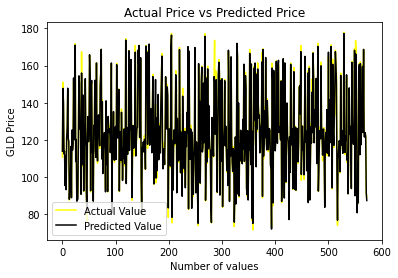

In [ ]:
plt.plot(Y_test,color='yellow',label= 'Actual Value')
plt.plot(test_data_prediction, color='black', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()